In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from itertools import chain 

## Driving times 

In [2]:
df = pd.read_csv("all_scenarios.csv").drop(columns=['Unnamed: 0'])
df.head()

,prob_A,prob_B,prob_C,prob_D,Run,Average driving time,Probs,Worst bridge delay,Worst bridge name
0,0.0,0.0,0.0,0.0,0,585.0,"{'A': 0, 'B': 0, 'C': 0, 'D': 0}",0.0,CORNAIL HAT BOX CULVERT
1,0.0,0.0,0.0,0.0,1,585.0,"{'A': 0, 'B': 0, 'C': 0, 'D': 0}",0.0,CORNAIL HAT BOX CULVERT
2,0.0,0.0,0.0,0.0,2,585.0,"{'A': 0, 'B': 0, 'C': 0, 'D': 0}",0.0,CORNAIL HAT BOX CULVERT
3,0.0,0.0,0.0,0.0,3,585.0,"{'A': 0, 'B': 0, 'C': 0, 'D': 0}",0.0,CORNAIL HAT BOX CULVERT
4,0.0,0.0,0.0,0.0,4,585.0,"{'A': 0, 'B': 0, 'C': 0, 'D': 0}",0.0,CORNAIL HAT BOX CULVERT


In [23]:
dfBar = pd.DataFrame(columns = ["Scenario", "Variable", "Time"])

xlist = [0,10,20,30,40,50,60,70,80]

for x in xlist:
    scenario = xlist.index(x)
    ave = df.iloc[x:(x+10)]["Average driving time"].mean()
    maxx = df.iloc[x:(x+10)]["Average driving time"].max()
    minn = df.iloc[x:(x+10)]["Average driving time"].min()
    dfAve = pd.DataFrame([[scenario,"Average driving time", ave]], columns = ["Scenario", "Variable", "Time"])
    dfMaxx = pd.DataFrame([[scenario,"Average driving time", maxx]], columns = ["Scenario", "Variable", "Time"])
    dfMinn = pd.DataFrame([[scenario,"Average driving time", minn]], columns = ["Scenario", "Variable", "Time"])
    
    dfBar = dfBar.append(dfAve)
    dfBar = dfBar.append(dfMaxx)
    dfBar = dfBar.append(dfMinn)
dfBar.head()

/var/folders/67/z86xx6d17h73gd6gbk3_m8jw0000gn/T/ipykernel_68207/1254912606.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfBar = dfBar.append(dfAve)
/var/folders/67/z86xx6d17h73gd6gbk3_m8jw0000gn/T/ipykernel_68207/1254912606.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfBar = dfBar.append(dfMaxx)
/var/folders/67/z86xx6d17h73gd6gbk3_m8jw0000gn/T/ipykernel_68207/1254912606.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfBar = dfBar.append(dfMinn)
/var/folders/67/z86xx6d17h73gd6gbk3_m8jw0000gn/T/ipykernel_68207/1254912606.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dfBar = dfBar.append(dfAve)
/var/folders/6

,Scenario,Variable,Time
0,0,Average driving time,585.0
0,0,Average driving time,585.0
0,0,Average driving time,585.0
0,1,Average driving time,585.0
0,1,Average driving time,585.0


In [29]:
'''df_result = pd.DataFrame(columns = ["Scenario", "Variable", "Time"])

xlist = [0,10,20,30,40,50,60,70,80]

for x in xlist:
    scenario = xlist.index(x)
    ave = df.iloc[x:(x+10)]["Worst bridge delay"].mean()
    mindrive = df.iloc[x:(x+10)]["Worst bridge delay"].min()
    maxdrive = df.iloc[x:(x+10)]["Worst bridge delay"].max()
    
    dfAve = pd.DataFrame([[scenario,"Average driving time", ave]], columns = ["Scenario", "Variable", "Time"])
    dfmindrive = pd.DataFrame([[scenario,"Minimum driving time", mindrive]], columns = ["Scenario", "Variable", "Time"])
    dfmaxdrive = pd.DataFrame([[scenario,"Maximum driving time", maxdrive]], columns = ["Scenario", "Variable", "Time"])
    
    
    df_result = df_result.append(dfAve)
    df_result = df_result.append(dfmindrive)
    df_result = df_result.append(dfmaxdrive)
   
df_result.head()'''


df_result = pd.DataFrame(columns = ["Scenario", "Variable", "Time"])

xlist = [0,10,20,30,40,50,60,70,80]

for x in xlist:
    scenario = xlist.index(x)
    ave = df.iloc[x:(x+10)]["Average driving time"].mean()
    maxx = df.iloc[x:(x+10)]["Average driving time"].max()
    minn = df.iloc[x:(x+10)]["Average driving time"].min()
    dfAve = pd.DataFrame([[scenario,"Average driving time", ave]], columns = ["Scenario", "Variable", "Time"])
    # incldue min and max values with hue="Average driving time", for seaborn to plot shaded areas (see plot below)
    min_fill = pd.DataFrame([[scenario,"Average driving time", maxx]], columns = ["Scenario", "Variable", "Time"])
    max_fill = pd.DataFrame([[scenario,"Average driving time", minn]], columns = ["Scenario", "Variable", "Time"])
    # include min and max values again with correct hues, for seaborn to plot distinct min and max plot lines (see plot below)
    dfmin = pd.DataFrame([[scenario,"Minimum driving time", minn]], columns =["Scenario", "Variable", "Time"])
    dfmax = pd.DataFrame([[scenario,"Maximum driving time", maxx]], columns =["Scenario", "Variable", "Time"])
    


    df_result = df_result.append(dfAve)
    df_result = df_result.append(min_fill)
    df_result = df_result.append(max_fill)
    df_result = df_result.append(dfmin)
    df_result = df_result.append(dfmax)

dfBar.head()

/var/folders/67/z86xx6d17h73gd6gbk3_m8jw0000gn/T/ipykernel_68207/1201185948.py:42: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(dfAve)
/var/folders/67/z86xx6d17h73gd6gbk3_m8jw0000gn/T/ipykernel_68207/1201185948.py:43: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(min_fill)
/var/folders/67/z86xx6d17h73gd6gbk3_m8jw0000gn/T/ipykernel_68207/1201185948.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(max_fill)
/var/folders/67/z86xx6d17h73gd6gbk3_m8jw0000gn/T/ipykernel_68207/1201185948.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df

,Scenario,Variable,Time
0,0,Average driving time,585.0
0,0,Average driving time,585.0
0,0,Average driving time,585.0
0,1,Average driving time,585.0
0,1,Average driving time,585.0


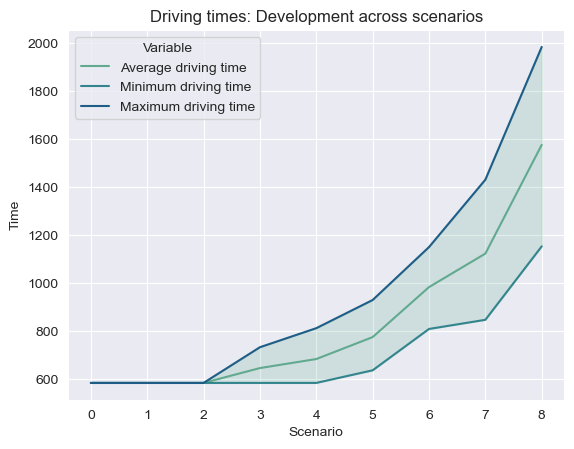

In [47]:
sns.set_style('darkgrid')
sns.lineplot(x='Scenario', y='Time', hue='Variable', data=df_result, palette='crest')


# fill space between minimum and maximum drive time 
#ax.fill_between(df_result,
 #               y1=df_result.loc[(df_result['Variable']=='Minimum driving time')].drop(columns=['Scenario','Variable']))#,
               # y2=df_result.loc[(df_result['Variable']=='Maximum driving time')].drop(columns=['Scenario','Variable']))

plt.title('Driving times: Development across scenarios')
plt.savefig('driving_time.png')

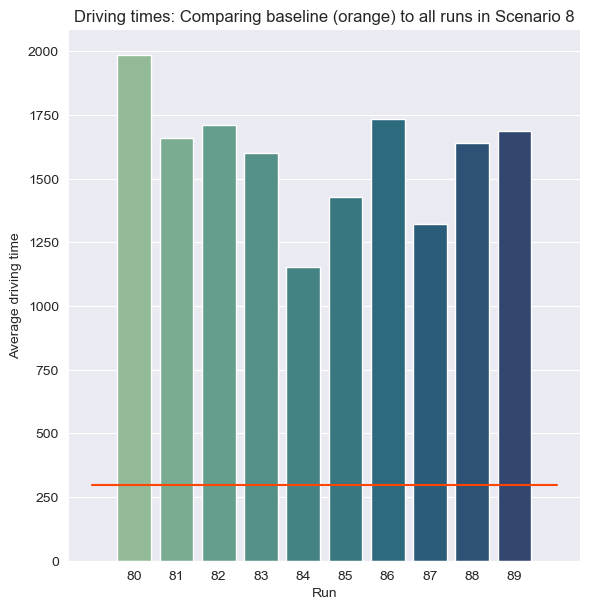

In [5]:
g = sns.catplot(
    data=df.tail(10), kind="bar",
    x="Run", y="Average driving time", errorbar="sd", palette="crest", alpha=1, height=6)
g.despine(left=True)
g.set_axis_labels("Run", "Average driving time")
sns.lineplot(x = [-1,10], y=299, color='orangered')
plt.title('Driving times: Comparing baseline (orange) to all runs in Scenario 8')
plt.savefig('scenarios_one_eight.png')

## Delay Time 

In [6]:
df_delay = pd.read_csv("all_scenarios.csv").drop(columns=['Unnamed: 0','prob_A','prob_B','prob_C','prob_D','Run','Probs'])

In [7]:
scenario = list([[i]*10 for i in range(0,9)])
scenario = list(chain.from_iterable(scenario))
df_delay['Scenario'] = scenario

In [8]:
df_delay = df_delay.rename(columns={'Worst bridge delay':'delay time'})

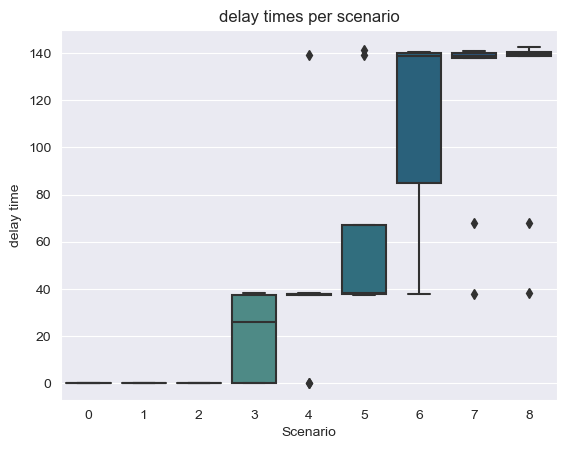

In [42]:
sns.boxplot(x='Scenario',y='delay time', data=df_delay, palette='crest');
plt.title('delay times per scenario');
plt.savefig('delay_time.png')

## Bridges

In [11]:
df = pd.read_csv("all_scenarios.csv").drop(columns=['Unnamed: 0'])
df_sorted = df.sort_values(by = "Worst bridge delay", ascending=False).drop_duplicates(subset = 'Worst bridge name')
df_sorted.shape

(21, 9)

In [12]:
df_bridge_count = df[df["Worst bridge delay"] != 0]
df_bridge_count = df_bridge_count['Worst bridge name'].value_counts()
df_bridge_count

KANCHPUR PC GIRDER BRIDGE                10
MEGHNA BRIDGE                             8
Ginlatoly                                 5
Daud Kandi Bridge                         5
BORO KUMIRA BRIDGE                        4
DHOOM GHAT PC GIRDER                      3
MOLLIK PARA BRIDGE (R)                    2
SALAKHARPAD BRIDGE                        2
ISAMATI BOX CULVERT                       2
MUHURI BRIDGE                             2
BAROCONDO BRIDGE                          2
SHAHID NAGIR                              1
CHANDINA- SHAHA PARA RCC GIDER GRIDGE     1
PURPU DURGAPURE BOX CUL                   1
ILLIOT BAZER                              1
ASHIR CHAR (R)                            1
BOSONTA PUR BOX CULVERT                   1
LANGOLBANDO PC GIDER BRIDGE               1
LAMUA BRIDGE                              1
LAL BAG RCC GIDER BRIDGE                  1
Name: Worst bridge name, dtype: int64

In [13]:
worst_bridges = df.loc[(df["Worst bridge name"] == "KANCHPUR PC GIRDER BRIDGE") | 
                               (df["Worst bridge name"] == "MEGHNA BRIDGE") | 
                               (df["Worst bridge name"] == "Ginlatoly") | 
                               (df["Worst bridge name"] == "Daud Kandi Bridge") | 
                               (df["Worst bridge name"] == "BORO KUMIRA BRIDGE") | 
                               (df["Worst bridge name"] == "BDHOOM GHAT PC GIRDER") | 
                               (df["Worst bridge name"] == "MOLLIK PARA BRIDGE (R)") | 
                               (df["Worst bridge name"] == "SALAKHARPAD BRIDGE") | 
                               (df["Worst bridge name"] == "ISAMATI BOX CULVERT") | 
                               (df["Worst bridge name"] == "MUHURI BRIDGE") | 
                               (df["Worst bridge name"] == "BAROCONDO BRIDGE")]
worst_bridges = worst_bridges.sort_values(by='Worst bridge delay')

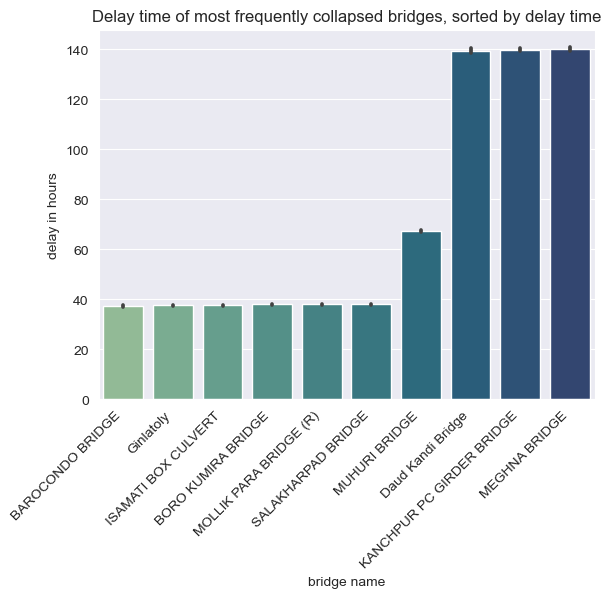

In [41]:
# rename columns for better naming in the plot 
worst_bridges = worst_bridges.rename(columns={"Worst bridge name":"bridge name", 
                                           "Worst bridge delay":"delay in hours"})

sns.set_style('darkgrid')
#sns.dark_palette("seagreen", n_colors=len(worst_bridges), start=2)

ax = sns.barplot(x='bridge name', y='delay in hours', data=worst_bridges, palette='crest');
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha ='right')
plt.title("Delay time of most frequently collapsed bridges, sorted by delay time");
plt.savefig('delay_time_of_worst_bridged.png')

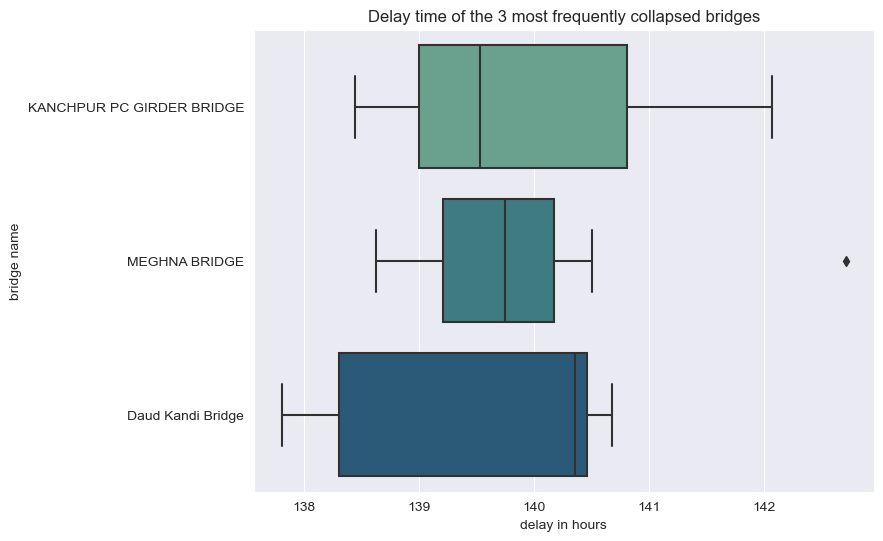

In [74]:
### show delaytime boxplots
worst3_bridges = df.loc[(df["Worst bridge name"] == "KANCHPUR PC GIRDER BRIDGE") | 
                               (df["Worst bridge name"] == "MEGHNA BRIDGE") | 
                               (df["Worst bridge name"] == "Daud Kandi Bridge")]

# rename columns for better naming in the plot 
worst3_bridges = worst3_bridges.rename(columns={"Worst bridge name":"bridge name", 
                                           "Worst bridge delay":"delay in hours"})

fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=worst3_bridges["delay in hours"], y=worst3_bridges["bridge name"], orient="h", palette ="crest")
'plt.tight_layout()'
plt.title("Delay time of the 3 most frequently collapsed bridges")
plt.savefig('delay_time_3bridges.png')